odruda,id,vynos_2023,vynos_2024,typ_hnojiva,zlepseni,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
A,16,5,7.97,synteticke,2.97,TRUE,FALSE


odruda,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,0.1029293,0.06000,-1.2500,1.390,0.5770690,0.78995539,0.3287805
B,-0.0381000,-0.04500,-1.3100,1.060,0.5067956,0.62550391,0.8551948
C,-0.0219550,-0.02975,-1.5935,1.625,0.6473816,0.98402362,0.8713272
D,0.0632000,0.11000,-1.1500,1.140,0.5708029,0.05441567,0.3029567


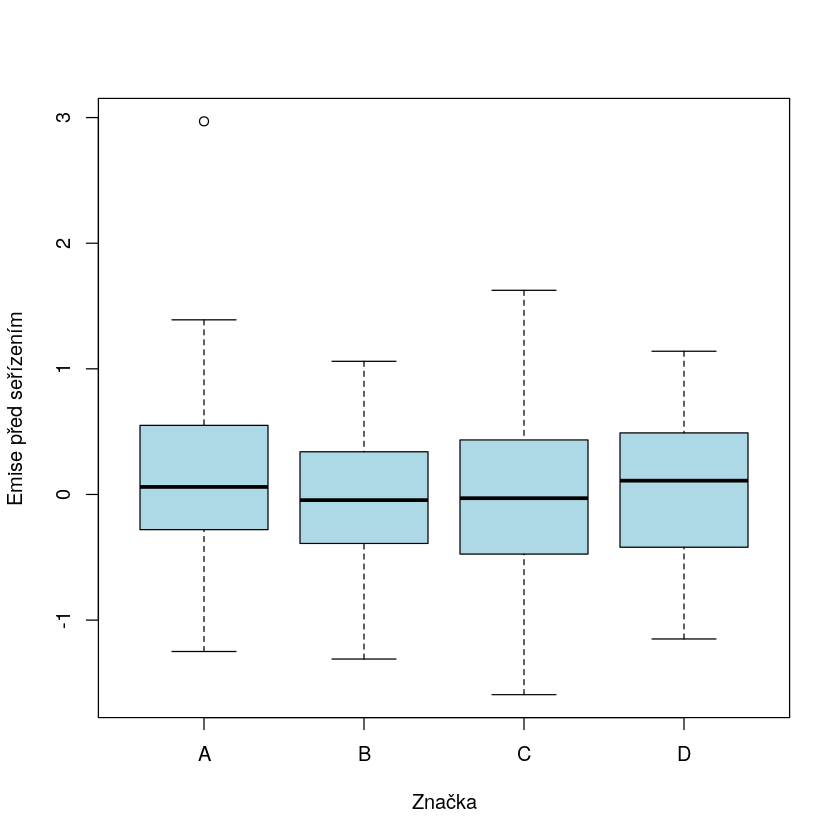

In [45]:
library(readxl)
library(dplyr)
library(ggplot2)
library(rstatix)
library(tidyr)

# Load the data
data <- read_excel("zk3B.xlsx")


# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$vynos_2024 - data$vynos_2023)

boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

outliers <- data %>%
    group_by(odruda) %>%
    rstatix::identify_outliers(zlepseni)

outliers

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)
# boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(odruda) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry


# 4

In [46]:
a_zlepseni = data$zlepseni[data$odruda == "A"]

mean(a_zlepseni)
t.test(a_zlepseni, alternative = "greater")

[1] 0.1029293


	One Sample t-test

data:  a_zlepseni
t = 1.7747, df = 98, p-value = 0.03952
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.006621273         Inf
sample estimates:
mean of x 
0.1029293 


In [47]:
tab <- table(a_zlepseni < 0)
tab
p <- tab[2] / sum(tab)
p
9 / (p * (1 - p))
x <- tab[2]
n <- sum(tab)
binom.test(x, n, p = 0.5, alternative = "two.sided")


FALSE  TRUE 
   54    45 

TRUE 
0.4545455

TRUE 
36.3


	Exact binomial test

data:  x and n
number of successes = 45, number of trials = 99, p-value = 0.4215
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3541366 0.5577462
sample estimates:
probability of success 
             0.4545455 


# 5

In [48]:
tab <- table(data$typ_hnojiva[data$odruda == "A"], a_zlepseni < 0)
tab <- tab[c(2, 1), c(2, 1)]
tab

            
             TRUE FALSE
  synteticke   23    11
  prirodni     22    43

[1] 0.3009851

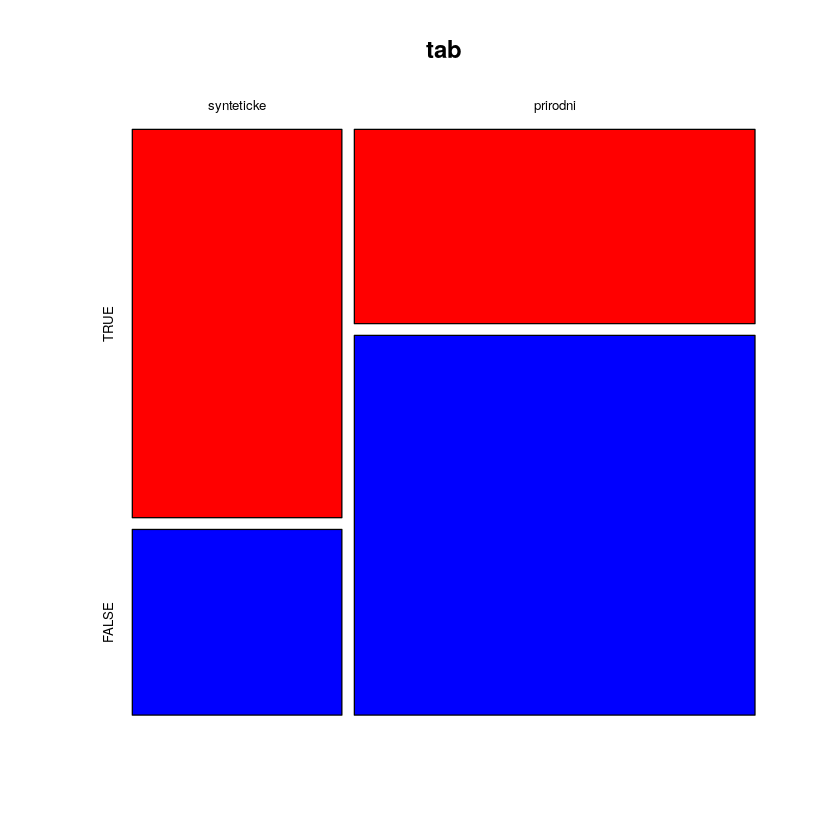

In [49]:
mosaicplot(tab, color = c("red", "blue"))
cramer_v(tab)

In [50]:
epiR::epi.2by2(tab)

             Outcome +    Outcome -      Total                 Inc risk *
Exposed +           23           11         34     67.65 (49.47 to 82.61)
Exposed -           22           43         65     33.85 (22.57 to 46.65)
Total               45           54         99     45.45 (35.41 to 55.77)

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 2.00 (1.32, 3.02)
Inc odds ratio                                 4.09 (1.69, 9.89)
Attrib risk in the exposed *                   33.80 (14.32, 53.28)
Attrib fraction in the exposed (%)            49.97 (24.48, 66.85)
Attrib risk in the population *                11.61 (-3.51, 26.73)
Attrib fraction in the population (%)         25.54 (7.06, 40.34)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 10.287 Pr>chi2 = 0.001
Fisher exact test that OR = 1: Pr>chi2 = 0.002
 Wald confidence limits
